In [2]:
import os,sys,glob,time 
import numpy as np
import cPickle as pickle
import matplotlib.pylab as plt 
import dimarray as da
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

os.chdir('/Users/peterpfleiderer/Documents/Projects/fahad/')
import srex_overview as srex_overview; reload(srex_overview)

# load polygons
pkl_file = open('srex_dict.pkl', 'rb')
srex = pickle.load(pkl_file)	;	pkl_file.close()

# load mask
masks=da.read_nc('360x720_360x720_pr_SREX_masks.nc4')['mask']

In [3]:
# load data 
data=da.read_nc('test.nc4')['pr']

# store regional distributions in dict
distr_dict={}
for region in masks.region:
    if region!='global':
        print region
        reg_mask=masks[region]
        reg_mask[np.isfinite(reg_mask)]=1
        # mask everything but region and reshape to a 1D array
        xx=np.asarray(data*reg_mask).reshape(720*360*80)
        # drop all nan values
        distr_dict[region]=xx[np.logical_not(np.isnan(xx))]


/Users/peterpfleiderer/anaconda/envs/py_masks/lib/python2.7/site-packages/dimarray/io/nc.py:625: RuntimeWarning: 'bnds' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


WSA
CAS
NEB
NAS
CAM
NAU
NEU
TIB
CGI
SAH
SAF
EAF
CEU
AMZ
SEA
SAS
EAS
SAU
ENA
WAF
WNA
CNA
WAS
MED
ALA
SSA


In [7]:
# define sun-plot functions

# this plot-function will be applied to all small plot windows over the SREX regions
def distrs(subax,region,arg1=None,arg2=None,arg3=None):
    # plot boxplot
    subax.boxplot(distr_dict[region])
    # settings to make plot look nicer
    subax.set_ylim((0,120))
    subax.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off') 
    subax.tick_params(axis='y',which='both',left='on',right='on',labelleft='off') 
    subax.locator_params(axis = 'x', nbins = 5)
    # add region name
    subax.annotate('   '+region, xy=(0, 0), xycoords='axes fraction', fontsize=10,xytext=(-5, 5), textcoords='offset points',ha='left', va='bottom')

# this is the plot explaining the axes etc.
def example_plot(subax):
    subax.set_ylim((0,120))
    subax.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='on') 
    subax.tick_params(axis='y',which='both',left='on',right='on',labelleft='on') 
    subax.set_ylabel('bla')
    subax.set_xlabel('')
    subax.set_title('example')
    subax.locator_params(axis = 'x', nbins = 5)

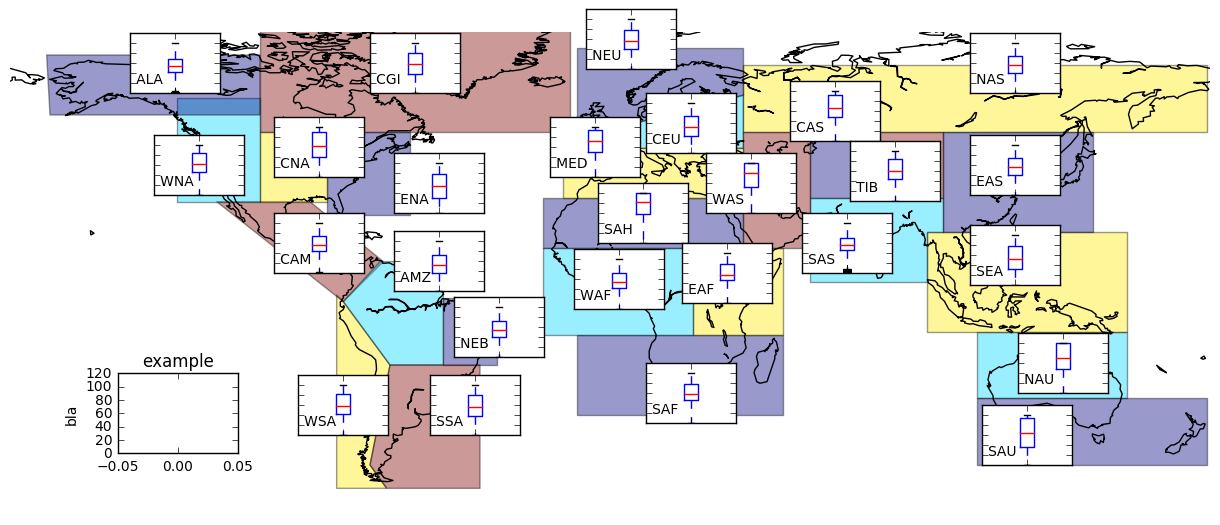

In [8]:
# plot
srex_overview.srex_overview(distrs,srex_polygons=srex,example_plot=example_plot,output_name='test.png')
plt.show()